In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Immigration_april.csv') 
print(list(set(df['Citizenship'])))

['Ireland', 'EU15 to EU27 (accession countries joined post 2004)', 'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)', 'All countries excluding Ireland,United Kingdom and EU272020', 'United Kingdom', 'All Countries']


In [3]:
line_df = df[(df['Sex'] == 'Both sexes') & (df['Citizenship'] == 'All Countries')]

                              Statistic Label  Year         Sex  \
0    Estimated Immigration (Persons in April)  1996  Both sexes   
18   Estimated Immigration (Persons in April)  1997  Both sexes   
36   Estimated Immigration (Persons in April)  1998  Both sexes   
54   Estimated Immigration (Persons in April)  1999  Both sexes   
72   Estimated Immigration (Persons in April)  2000  Both sexes   
90   Estimated Immigration (Persons in April)  2001  Both sexes   
108  Estimated Immigration (Persons in April)  2002  Both sexes   
126  Estimated Immigration (Persons in April)  2003  Both sexes   
144  Estimated Immigration (Persons in April)  2004  Both sexes   
162  Estimated Immigration (Persons in April)  2005  Both sexes   
180  Estimated Immigration (Persons in April)  2006  Both sexes   
198  Estimated Immigration (Persons in April)  2007  Both sexes   
216  Estimated Immigration (Persons in April)  2008  Both sexes   
234  Estimated Immigration (Persons in April)  2009  Both sexe

In [4]:
year = 2024
countries_df = df[(df['Sex'] == 'Both sexes') & (df['Year'] == year)]
countries_df = countries_df[countries_df['Citizenship'] != 'All Countries']

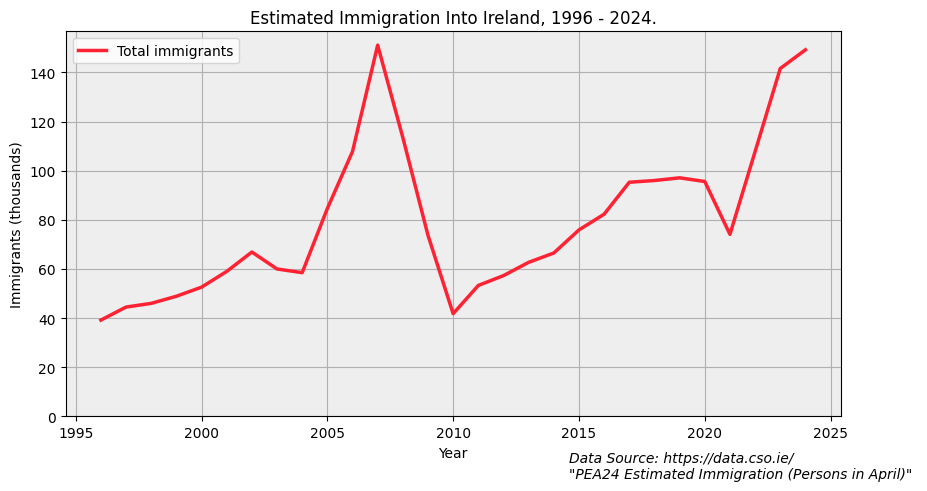

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

line_df.plot(x="Year", y="VALUE", kind="line", marker="None", linestyle="-", color="#FF2233", linewidth=2.5, ax=ax, label="Total immigrants")

title_string = "Estimated Immigration Into Ireland, 1996 - 2024."

plt.title(title_string)
plt.xlabel('Year')
plt.ylabel('Immigrants (thousands)')
ax.set_ylim(0)
ax.set_facecolor('#EEEEEE') 
plt.grid(True)

plt.text(0.65, -0.16, "Data Source: https://data.cso.ie/\n\"PEA24 Estimated Immigration (Persons in April)\" ", ha='left',
         transform=ax.transAxes, fontdict={'fontstyle': 'italic', 'fontsize': 10})

save_fig = 'immigration-1996-2024.png'
plt.savefig(save_fig, bbox_inches="tight")

# Show the plot
plt.show()

In [6]:
lines_df = df[df['Sex'] == 'Both sexes']

In [7]:
list_of_countries = list(set(lines_df['Citizenship']))
print(list_of_countries)

['Ireland', 'EU15 to EU27 (accession countries joined post 2004)', 'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)', 'All countries excluding Ireland,United Kingdom and EU272020', 'United Kingdom', 'All Countries']


In [11]:
lines_df['Citizenship'] = lines_df['Citizenship'].apply(changeNames)
print(list(set(lines_df['Citizenship'])))

['Ireland', 'Other', 'EU14', 'UK', 'EU15']


C:\Users\Tom\AppData\Local\Temp\ipykernel_17328\1342140597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_df['Citizenship'] = lines_df['Citizenship'].apply(changeNames)


In [12]:
def compare(df, c1, c2, c3, c4):
    c1_df = df[df['Citizenship'] == c1] 
    c2_df = df[df['Citizenship'] == c2] 
    c3_df = df[df['Citizenship'] == c3] 
    c4_df = df[df['Citizenship'] == c4] 
    
    return c1_df, c2_df, c3_df, c4_df
c1_str = "EU15"
c2_str = "EU14"
c3_str = "Other"
c4_str = "UK"
c1, c2, c3, c4 = compare(lines_df, c1_str, c2_str, c3_str, c4_str)

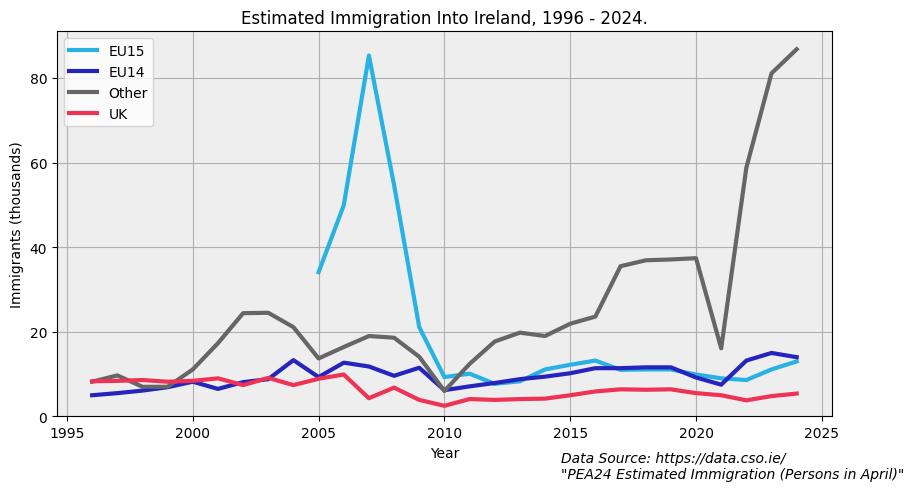

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

c1.plot(x="Year", y="VALUE", kind="line", marker="None", linestyle="-", color="#28B2E3", linewidth=3, ax=ax, label=c1_str)
c2.plot(x="Year", y="VALUE", kind="line", marker="None", linestyle="-", color="#2525BE", linewidth=3, ax=ax, label=c2_str)
c3.plot(x="Year", y="VALUE", kind="line", marker="None", linestyle="-", color="#666", linewidth=3, ax=ax, label=c3_str)
c4.plot(x="Year", y="VALUE", kind="line", marker="None", linestyle="-", color="#E35", linewidth=3, ax=ax, label=c4_str)

title_string = "Estimated Immigration Into Ireland, 1996 - 2024."

plt.title(title_string)
plt.xlabel('Year')
plt.ylabel('Immigrants (thousands)')
ax.set_ylim(0)
ax.set_facecolor('#EEEEEE') 
plt.grid(True)

plt.text(0.65, -0.16, "Data Source: https://data.cso.ie/\n\"PEA24 Estimated Immigration (Persons in April)\" ", ha='left',
         transform=ax.transAxes, fontdict={'fontstyle': 'italic', 'fontsize': 10})

save_fig = 'immigration'+c1_str+'-'+c2_str+c3_str+c4_str+'.png'
plt.savefig(save_fig, bbox_inches="tight")

# Show the plot
plt.show()

In [10]:
def changeNames(x):
    if x == "EU15 to EU27 (accession countries joined post 2004)":
        return "EU15"
    elif x == "EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)":
        return "EU14"
    elif x == "United Kingdom":
        return "UK"
    elif x == "All countries excluding Ireland,United Kingdom and EU272020":
        return "Other"
    else:
        return "Ireland"
countries_df['Citizenship'] = countries_df['Citizenship'].apply(changeNames)

In [206]:
list_of_countries = list(set(countries_df['Citizenship']))
print(list_of_countries)

['EU14', 'Ireland', 'EU15', 'UK', 'Other']


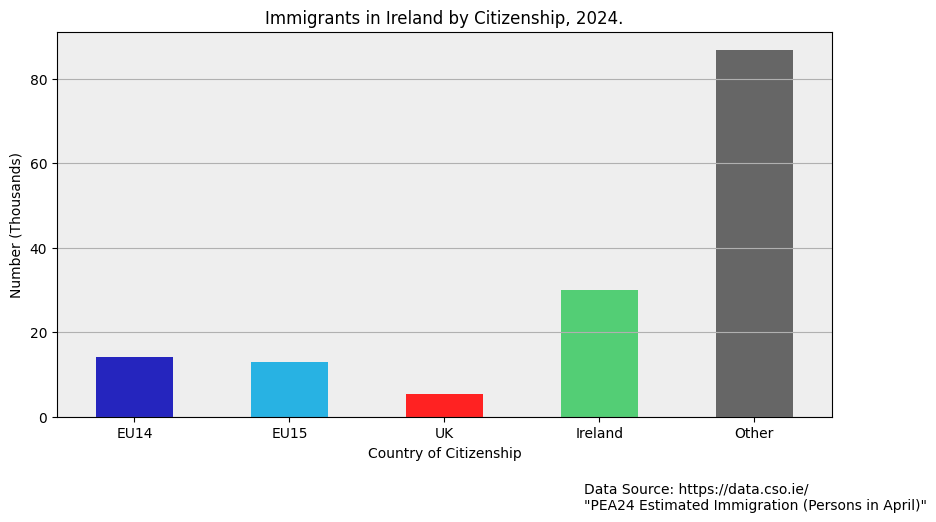

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

colors = ["#2525BE","#28B2E3","#FF2222","#53CE75","#666"]
countries_df.plot(x="Citizenship", y="VALUE", kind="bar", ax=ax, color=colors, label=None)
 
title_string = "Immigrants in Ireland by Citizenship, "+str(year)+"."
ax.set_title(title_string)
ax.set_facecolor('#EEEEEE') 
plt.xlabel('Country of Citizenship')
plt.ylabel('Number (Thousands)')
plt.xticks(rotation=0)
ax.legend().remove()
plt.grid(True, axis="y")

plt.text(0.68, -0.24, "Data Source: https://data.cso.ie/\n\"PEA24 Estimated Immigration (Persons in April)\"", ha='left', transform=ax.transAxes)

savefig = "immigration_citizenship_"+str(year)+".png"
plt.savefig(savefig, bbox_inches="tight")

plt.show()